# CLIMAF example (works only on CICLAD)
More informations about CLIMAF: https://climaf.readthedocs.io/en/master/

## Import main modules

In [1]:
from climaf.api import *

('LC debug :', False)
CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_1.2.12
python => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:


CliMAF version = 1.2.12


ncl 6.6.2 => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncdump
---


Cache directory set to : /data/mlalande/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/mlalande/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


In [2]:
# The years considered to plot the biases between IPSL and observational references
first_year=1984
last_year=2014

## "Load" model data

In [3]:
req_snow = ds(
    project='CMIP6', 
    model='IPSL-CM6A-LR',
    variable='snc', 
    table="LImon",
    frequency='monthly',
    realization='r1i1p1f1',
    period=str(first_year)+'-'+str(last_year),
    experiment='historical'
)

summary(req_snow)

/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/LImon/snc/gr/latest/snc_LImon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc


{'domain': 'global',
 'experiment': 'historical',
 'grid': 'g*',
 'institute': '*',
 'mip': '*',
 'model': 'IPSL-CM6A-LR',
 'period': 1984-2014,
 'project': 'CMIP6',
 'realization': 'r1i1p1f1',
 'root': '/bdd',
 'simulation': '',
 'table': 'LImon',
 'variable': 'snc',
 'version': 'latest'}

## Loading NOAA (2.0x1.75) reference dataset and selecting period

In [4]:
##Loading reference dataset and selecting period
##This is not the "elegant" way to do it, we should work on the creation of projec='ref_climatos'
refnoaa = fds(
    '/home/msantola/TP_CLiMAF/ReferenceSNOW/SNC/SNCRefData/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc',
    variable='snowc',
    period=str(first_year)+'-'+str(last_year)
)

## Compute seasonal climatology and compute bias

In [5]:
plotting_specs = dict(
    min=-50, 
    max=50, 
    delta=5, 
    contours=10,
    focus='land',
    color='MPL_RdBu'
)

In [6]:
# DJF biases
# -- Compute the climatologies
clim_ipsl_DJF = clim_average(req_snow,'DJF')
clim_obs_DJF = clim_average(refnoaa,'DJF')
# -- Then, the bias map
rgrd_dat_DJF = regrid(clim_ipsl_DJF,clim_obs_DJF)
clim_bias_DJF = minus(rgrd_dat_DJF,clim_obs_DJF)
map_DJF = plot(clim_bias_DJF,title='DJF snow cover bias (%)', **plotting_specs)

In [7]:
# MAM biases
# -- Compute the climatologies
clim_ipsl_MAM = clim_average(req_snow,'MAM')
clim_obs_MAM = clim_average(refnoaa,'MAM')
# -- Then, the bias map
rgrd_dat_MAM = regrid(clim_ipsl_MAM,clim_obs_MAM)
clim_bias_MAM = minus(rgrd_dat_MAM,clim_obs_MAM)
map_MAM = plot(clim_bias_MAM,title='MAM snow cover bias (%)', **plotting_specs)

In [8]:
# JJA biases
# -- Compute the climatologies
clim_ipsl_JJA = clim_average(req_snow,'JJA')
clim_obs_JJA = clim_average(refnoaa,'JJA')
# -- Then, the bias map
rgrd_dat_JJA = regrid(clim_ipsl_JJA,clim_obs_JJA)
clim_bias_JJA = minus(rgrd_dat_JJA,clim_obs_JJA)
map_JJA = plot(clim_bias_JJA,title='JJA snow cover bias (%)', **plotting_specs)

In [9]:
# SON biases
# -- Compute the climatologies
clim_ipsl_SON = clim_average(req_snow,'SON')
clim_obs_SON = clim_average(refnoaa,'SON')
# -- Then, the bias map
rgrd_dat_SON = regrid(clim_ipsl_SON,clim_obs_SON)
clim_bias_SON = minus(rgrd_dat_SON,clim_obs_SON)
map_SON = plot(clim_bias_SON,title='SON snow cover bias (%)', **plotting_specs)

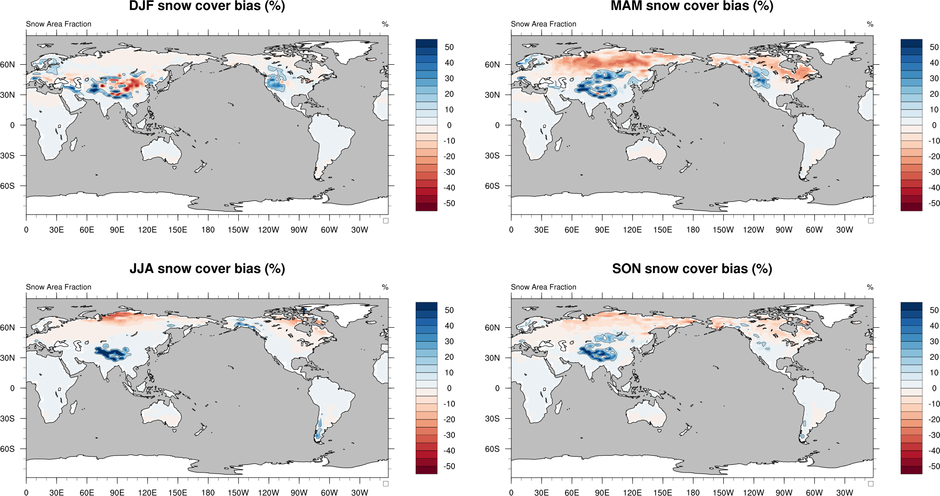

In [10]:
multiplot = cpage(fig_lines = [[map_DJF,map_MAM],[map_JJA,map_SON]])
iplot(multiplot)